In [1]:
import numpy as np
import math
import time
from numpy.linalg import norm 
from numpy.linalg import inv 
from matplotlib import pyplot as plt

## 1a

In [2]:
def evalF(x): 

    F = np.zeros(2)
    
    F[0] = 3*x[0]**2 - x[1]**2
    F[1] = 3*x[0]*x[1]**2 - x[0]**3 - 1
    return F

def evalJ(x): 

    J = np.array([[6*x[0],-2*x[1]], 
        [3*x[1]**2 - 3*x[0]**2, 6*x[0]*x[1]]])
    return J

def itterate(x0,tol,Nmax):

    J = np.array([[1/6,1/18],[0,1/6]])
    
    for its in range(Nmax):
        F = evalF(x0)
        x1 = x0 - J.dot(F)
        if (norm(x1-x0) < tol):
            xstar = x1
            ier =0
            return[xstar, ier,its]
           
        x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its] 

In [3]:
def driver():
    
    x0 = np.array([1,1])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    
    for j in range(50):
        [xstar,ier,its] =  itterate(x0,tol,Nmax)
        
    elapsed = time.time()-t
    print(xstar)
    print('the error message reads:',ier) 
    print('took this many seconds:',elapsed/50)
    print('number of iterations is:',its)
driver()

[0.5       0.8660254]
the error message reads: 0
took this many seconds: 0.00042877674102783205
number of iterations is: 33


## 1c

In [4]:
def Newton(x0,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
        J = evalJ(x0)
        Jinv = inv(J)
        F = evalF(x0)

        x1 = x0 - Jinv.dot(F)

        if (norm(x1-x0) < tol):
            xstar = x1
            ier =0
            return[xstar, ier, its]

        x0 = x1

    xstar = x1
    ier = 1
    return[xstar,ier,its]

In [5]:
def driver():
    
    x0 = np.array([1.,1.])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    
    for j in range(50):
        [xstar,ier,its] =  Newton(x0,tol,Nmax)
        
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
driver()

[0.5       0.8660254]
Newton: the error message reads: 0
Newton: took this many seconds: 0.0002103424072265625
Netwon: number of iterations is: 5


Newton takes far fewer iterations to converge.

## 3b

In [6]:
def evalF(x): 

    F = np.zeros(3)
    
    F = (x[0])**2 + 4*(x[1])**2 + 4*(x[2])**2 - 16
    fx = 2*x[0]
    fy = 8*x[1]
    fz = 8*x[2]
    
    return F, fx, fy, fz

def three(x0,tol,Nmax):

    errors = []
    
    for its in range(Nmax):
        F, fx, fy, fz = evalF(x0)
        d = F/(fx**2 + fy**2 + fz**2)
        
        x1 = x0 - np.multiply(d,[fx,fy,fz])
        
        errors.append(norm(x1-x0))
        
        if (norm(x1-x0) < tol):
            xstar = x1
            ier =0
            return[xstar, ier, its, errors]

        x0 = x1

    xstar = x1
    ier = 1
    return[xstar,ier,its, errors]
    

[1.09364232 1.36032838 1.36032838]
Newton: the error message reads: 0
Newton: took this many seconds: 0.00016769886016845703
Netwon: number of iterations is: 4


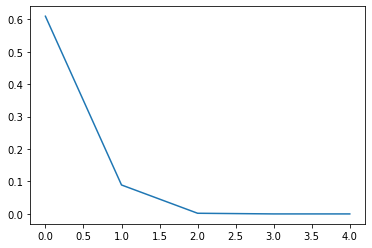

In [7]:
def driver():
    
    x0 = np.array([1,1,1])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    
    for j in range(50):
        [xstar,ier,its, errors] =  three(x0,tol,Nmax)
        
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
    
    plt.plot([0,1,2,3,4], errors)
    
driver()

We see the error decreases quadratically, thus quadratic convergence.